In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Get covid-19 dataset and make its analysis

Datasets Credits: https://www.kaggle.com/datasets/imdevskp/corona-virus-report?resource=download

Tables Information:

1. full_grouped.csv - Day to day country wise no. of cases (Has County/State/Province level data)
2. covid_19_clean_complete.csv - Day to day country wise no. of cases (Doesn't have County/State/Province level data)
3. country_wise_latest.csv - Latest country level no. of cases
4. day_wise.csv - Day wise no. of cases (Doesn't have country level data)
5. usa_county_wise.csv - Day to day county level no. of cases
6. worldometer_data.csv - Latest data from https://www.worldometers.info/

In [2]:
df = pd.read_csv('data/covid_19/full_grouped.csv')

In [3]:
###Check sample dataset
df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


#### Preliminary Data Analysis

In [22]:
df['Date'].min()

'2020-01-22'

In [23]:
df['Date'].max()

'2020-07-27'

In [24]:
###Let's check number of countries present in the dataset
df['Country/Region'].nunique()

187

In [5]:
df['WHO Region'].nunique()

6

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


We can see that 187 country data is present in the database

In [6]:
###Missing Value Analysis: Check null data present in dataset
df.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [7]:
###Statistical Attributes for the continuous features
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


In [8]:
# Identify continuous variables
continuous_vars = []
for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        continuous_vars.append(column)

# Print the continuous variables
print("Continuous variables:", continuous_vars)

Continuous variables: ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']


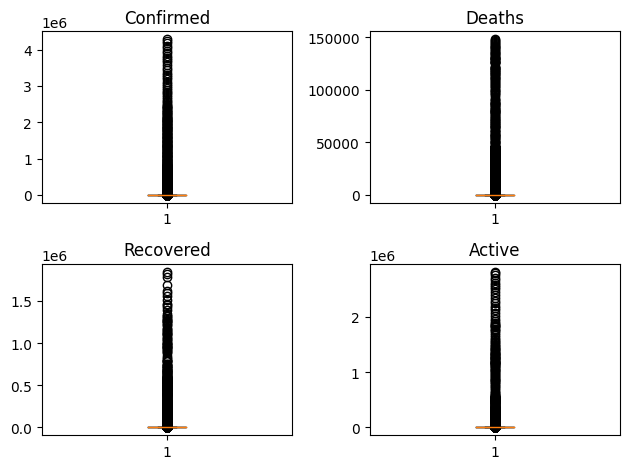

In [15]:
### We will check the boxplot for continuous variables
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axs = plt.subplots(2, 2)

# Plot data on each subplot
axs[0, 0].boxplot(df.loc[:,continuous_vars[0]])
axs[0, 0].set_title(continuous_vars[0])
axs[0, 1].boxplot(df.loc[:,continuous_vars[1]])
axs[0, 1].set_title(continuous_vars[1])
axs[1, 0].boxplot(df.loc[:,continuous_vars[2]])
axs[1, 0].set_title(continuous_vars[2])
axs[1, 1].boxplot(df.loc[:,continuous_vars[3]])
axs[1, 1].set_title(continuous_vars[3])

# Remove empty subplot
#fig.delaxes(axs[1, 1])

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

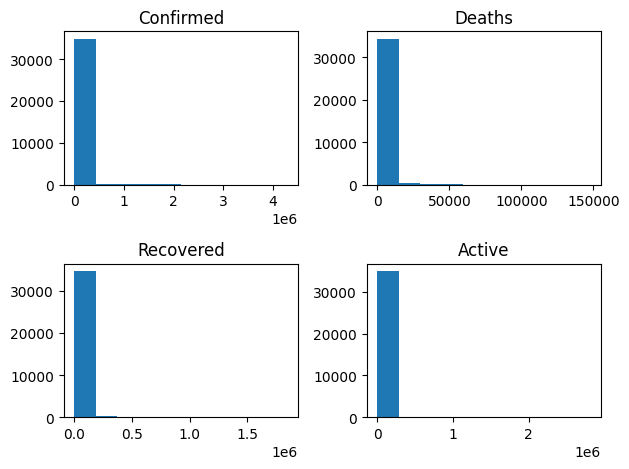

In [16]:
### We will check the hist for continuous variables

# Create a figure and subplots
fig, axs = plt.subplots(2, 2)

# Plot data on each subplot
axs[0, 0].hist(df.loc[:,continuous_vars[0]])
axs[0, 0].set_title(continuous_vars[0])
axs[0, 1].hist(df.loc[:,continuous_vars[1]])
axs[0, 1].set_title(continuous_vars[1])
axs[1, 0].hist(df.loc[:,continuous_vars[2]])
axs[1, 0].set_title(continuous_vars[2])
axs[1, 1].hist(df.loc[:,continuous_vars[3]])
axs[1, 1].set_title(continuous_vars[3])

# Remove empty subplot
#fig.delaxes(axs[1, 1])

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [23]:
###Computation of outliers using IQR Method
for column in continuous_vars:
    series = df.loc[:,column]
    # Calculate the quartiles and IQR
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    # Calculate the lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Find outliers
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    # Print the outliers
    print("Percentage of Outliers in ",column," Data is {:.2f}".format(100*len(outliers)/len(series)),"%")
    #print(outliers)

Percentage of Outliers in  Confirmed  Data is 17.96 %
Percentage of Outliers in  Deaths  Data is 18.43 %
Percentage of Outliers in  Recovered  Data is 17.68 %
Percentage of Outliers in  Active  Data is 17.93 %
Percentage of Outliers in  New cases  Data is 18.06 %
Percentage of Outliers in  New deaths  Data is 20.96 %
Percentage of Outliers in  New recovered  Data is 18.98 %


#### Highly Infected Countries

In [25]:
number_of_infected = df.groupby('Country/Region').Confirmed.agg('sum')

In [26]:
### Sort the data and present top 10
number_of_infected = number_of_infected.sort_values(ascending=False)
number_of_infected[:10]

Country/Region
US                224345948
Brazil             89524967
Russia             45408411
India              40883464
Spain              27404045
United Kingdom     26748587
Italy              26745145
France             21210926
Germany            21059152
Iran               19339267
Name: Confirmed, dtype: int64

<BarContainer object of 10 artists>

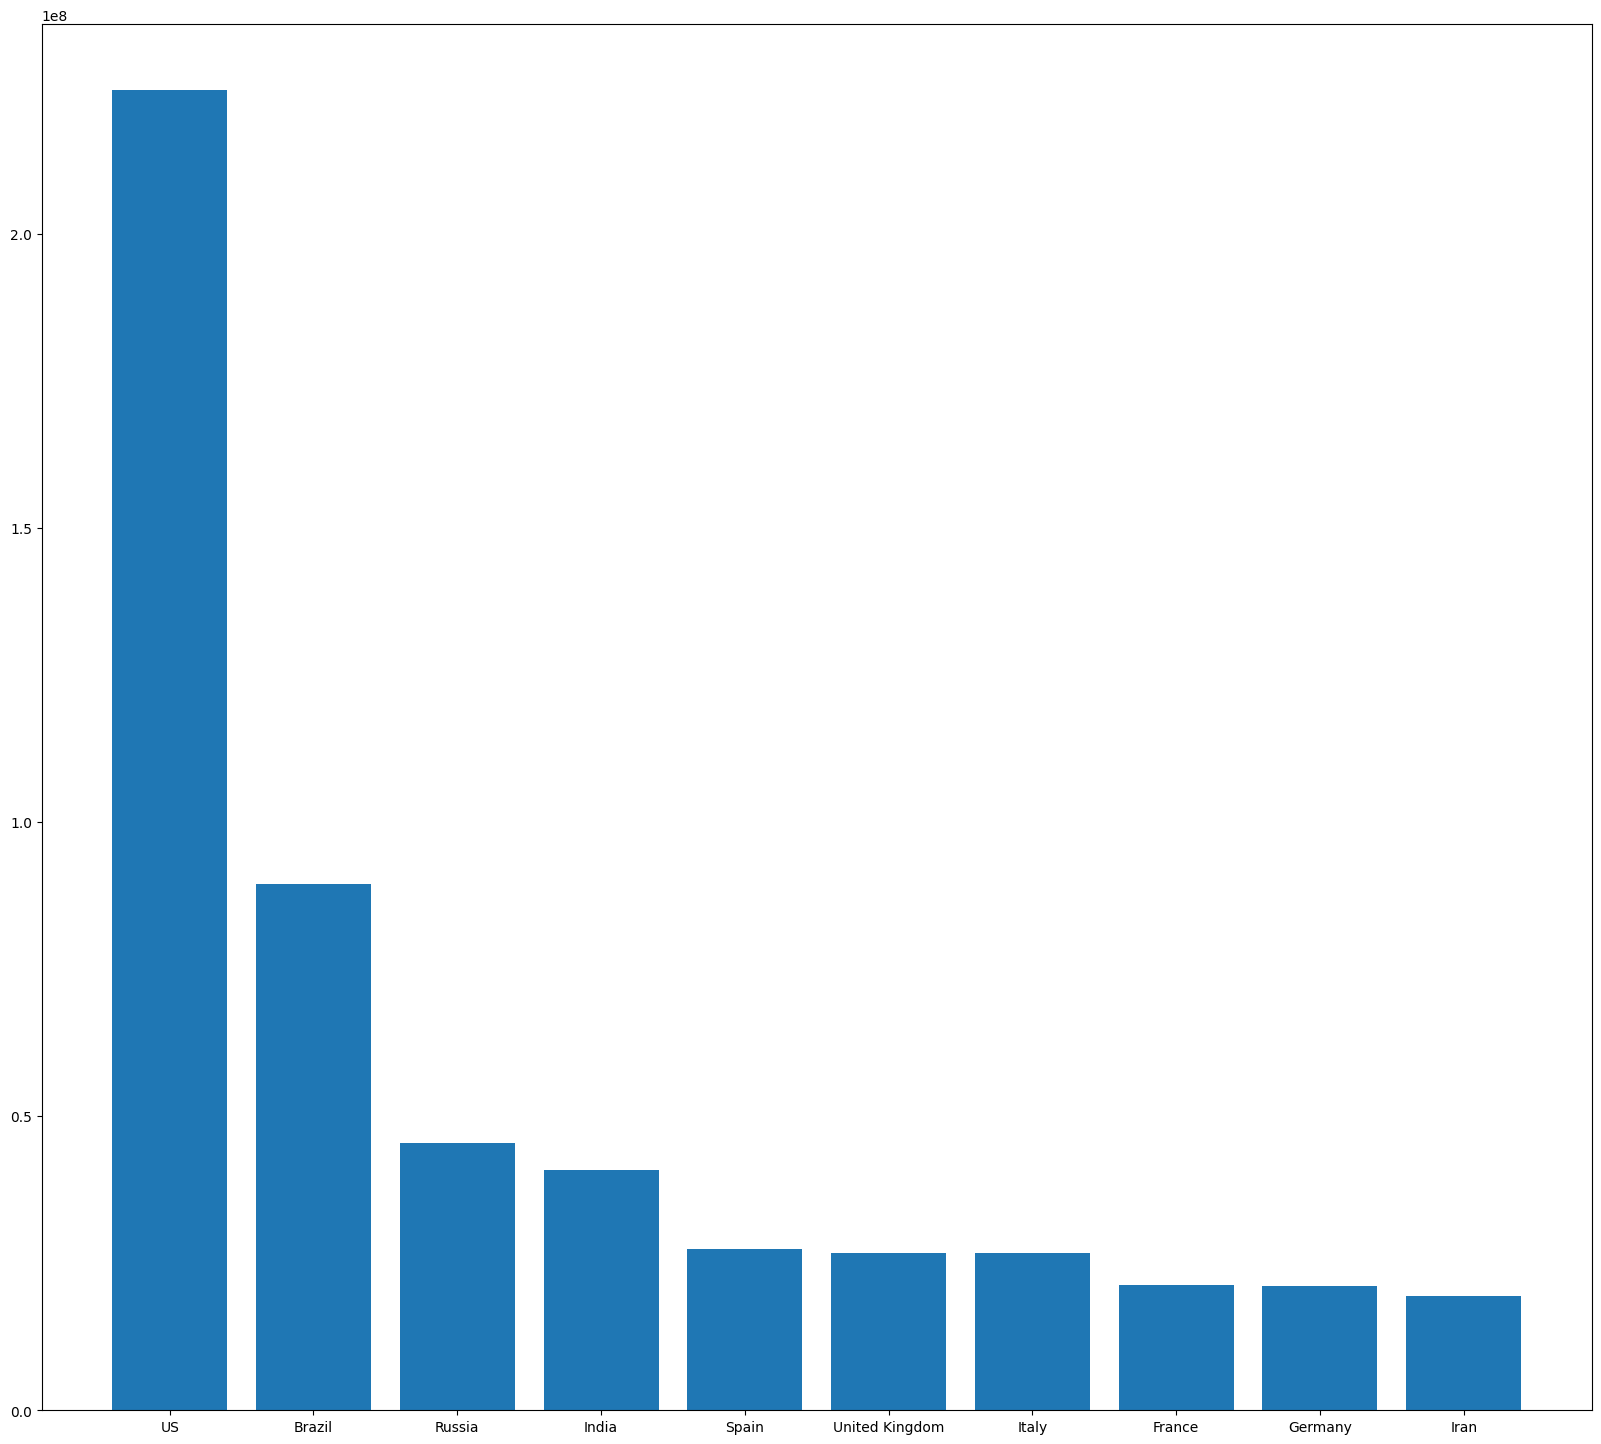

In [27]:
plt.figure(figsize=(20,18))
plt.bar(number_of_infected[:10].index,number_of_infected[:10])

We can see that US has got highest number of infected people followed by Brazil and Russia

#### High Mortality Rates

In [28]:
###Check countries with maximum mortality
number_of_mortality = df.groupby('Country/Region').Deaths.agg('sum')

In [29]:
number_of_mortality = number_of_mortality.sort_values(ascending=False)
number_of_mortality[:10]

Country/Region
US                11011411
United Kingdom     3997775
Brazil             3938034
Italy              3707717
France             3048524
Spain              3033030
Mexico             1728277
India              1111831
Iran               1024136
Belgium             963679
Name: Deaths, dtype: int64

<BarContainer object of 10 artists>

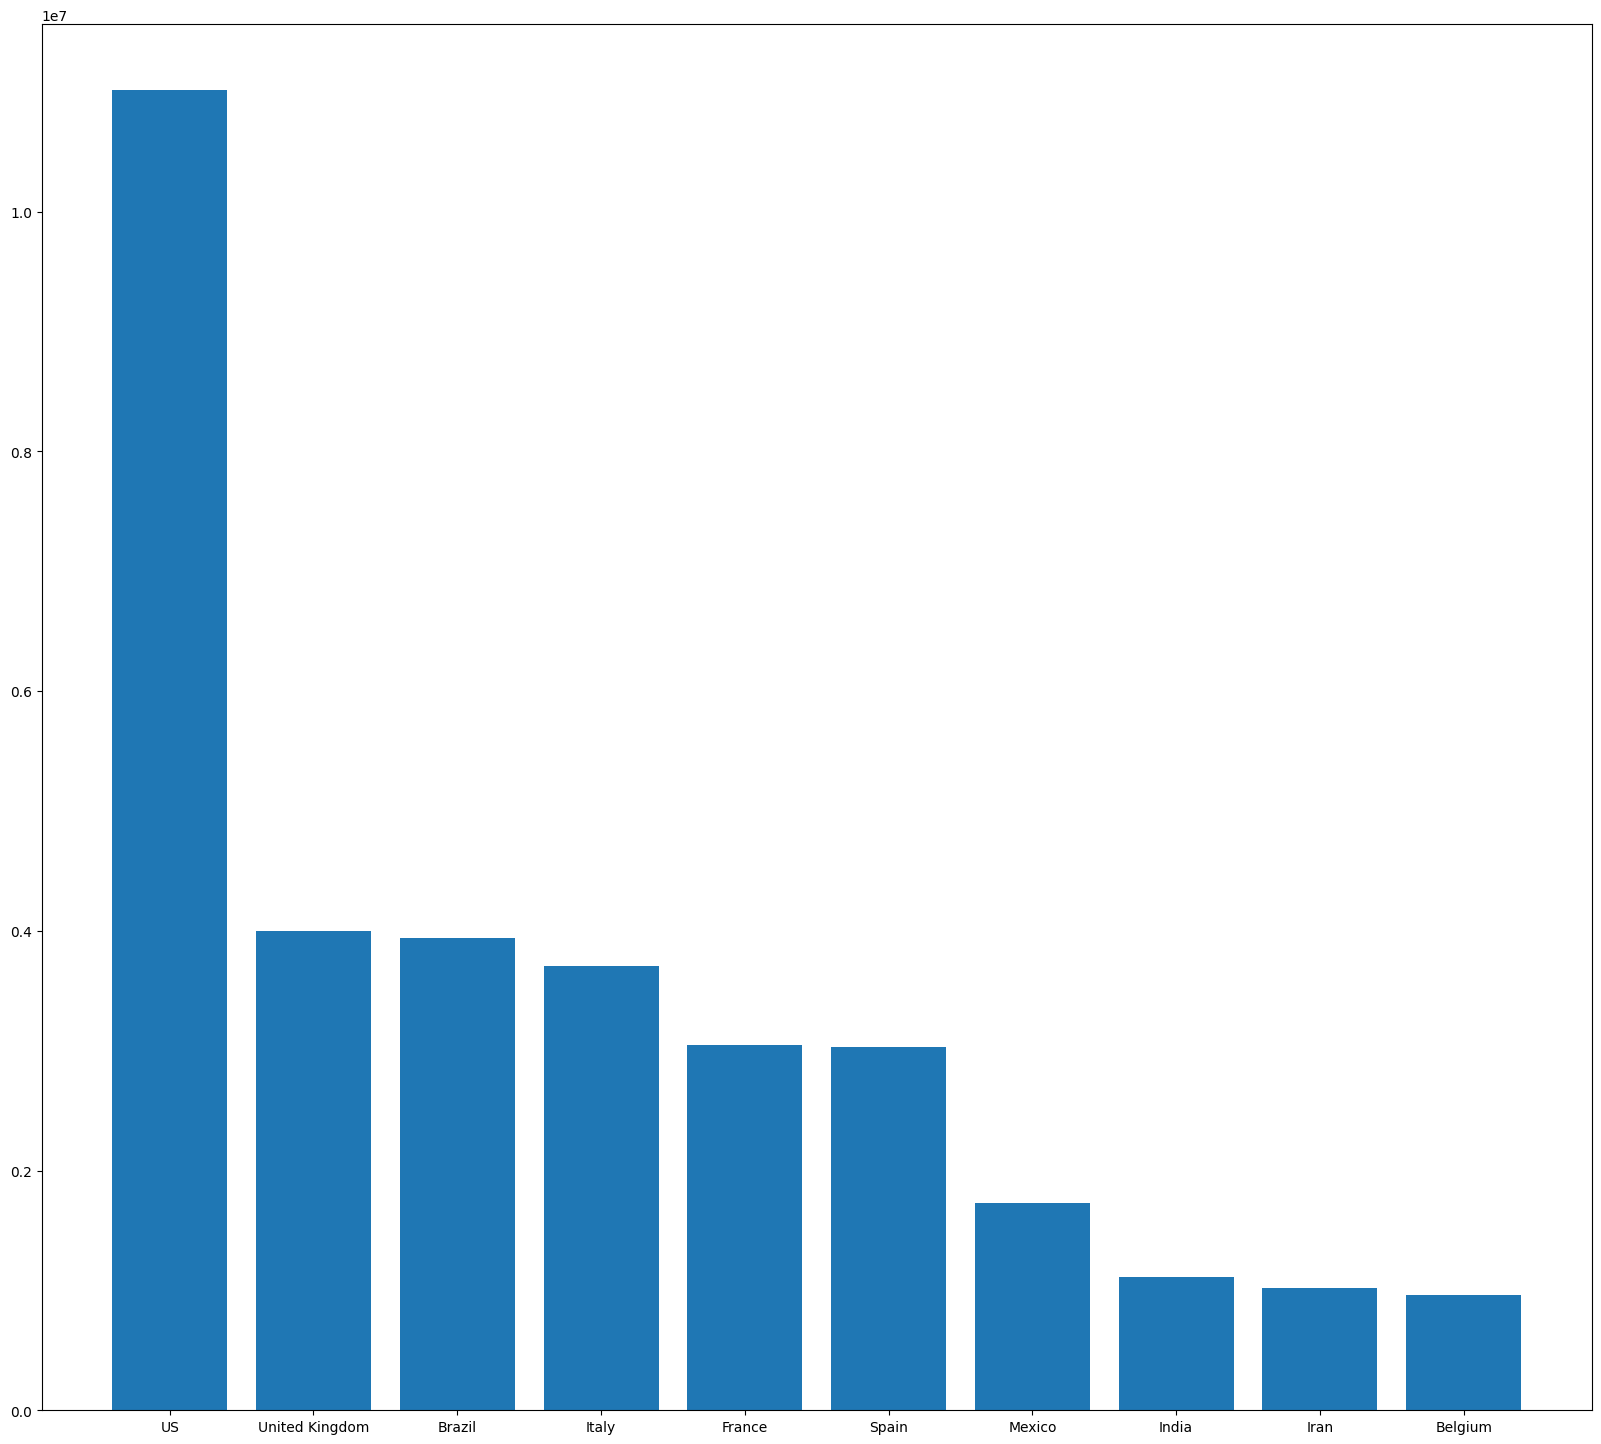

In [30]:
###Check the maximum mortality 
plt.figure(figsize=(20,18))
plt.bar(number_of_mortality[:10].index,number_of_mortality[:10])

In [31]:
###Import the worldometer_Data as it contains population information also per country
### So can be used to compute total deaths/total population
### Data Reference : https://www.kaggle.com/datasets/josephassaker/covid19-global-dataset
df1 = pd.read_csv('data/covid_19/worldometer_data.csv')

In [32]:
df1.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [33]:
df1['Mortality_rates'] = 100*df1['TotalDeaths']/df1['Population']

In [34]:
mortality_rates = df1.groupby('Country/Region').Mortality_rates.agg('sum')

In [35]:
mortality_rates = mortality_rates.sort_values(ascending=False)
mortality_rates[:10]

Country/Region
San Marino    0.123755
Belgium       0.085030
UK            0.068333
Andorra       0.067290
Peru          0.061860
Spain         0.060954
Italy         0.058206
Sweden        0.057057
Chile         0.051687
USA           0.049156
Name: Mortality_rates, dtype: float64

We can see mortality rates and see some of countries were having about 0.12% signifying lot of human losses for this countries.

<BarContainer object of 10 artists>

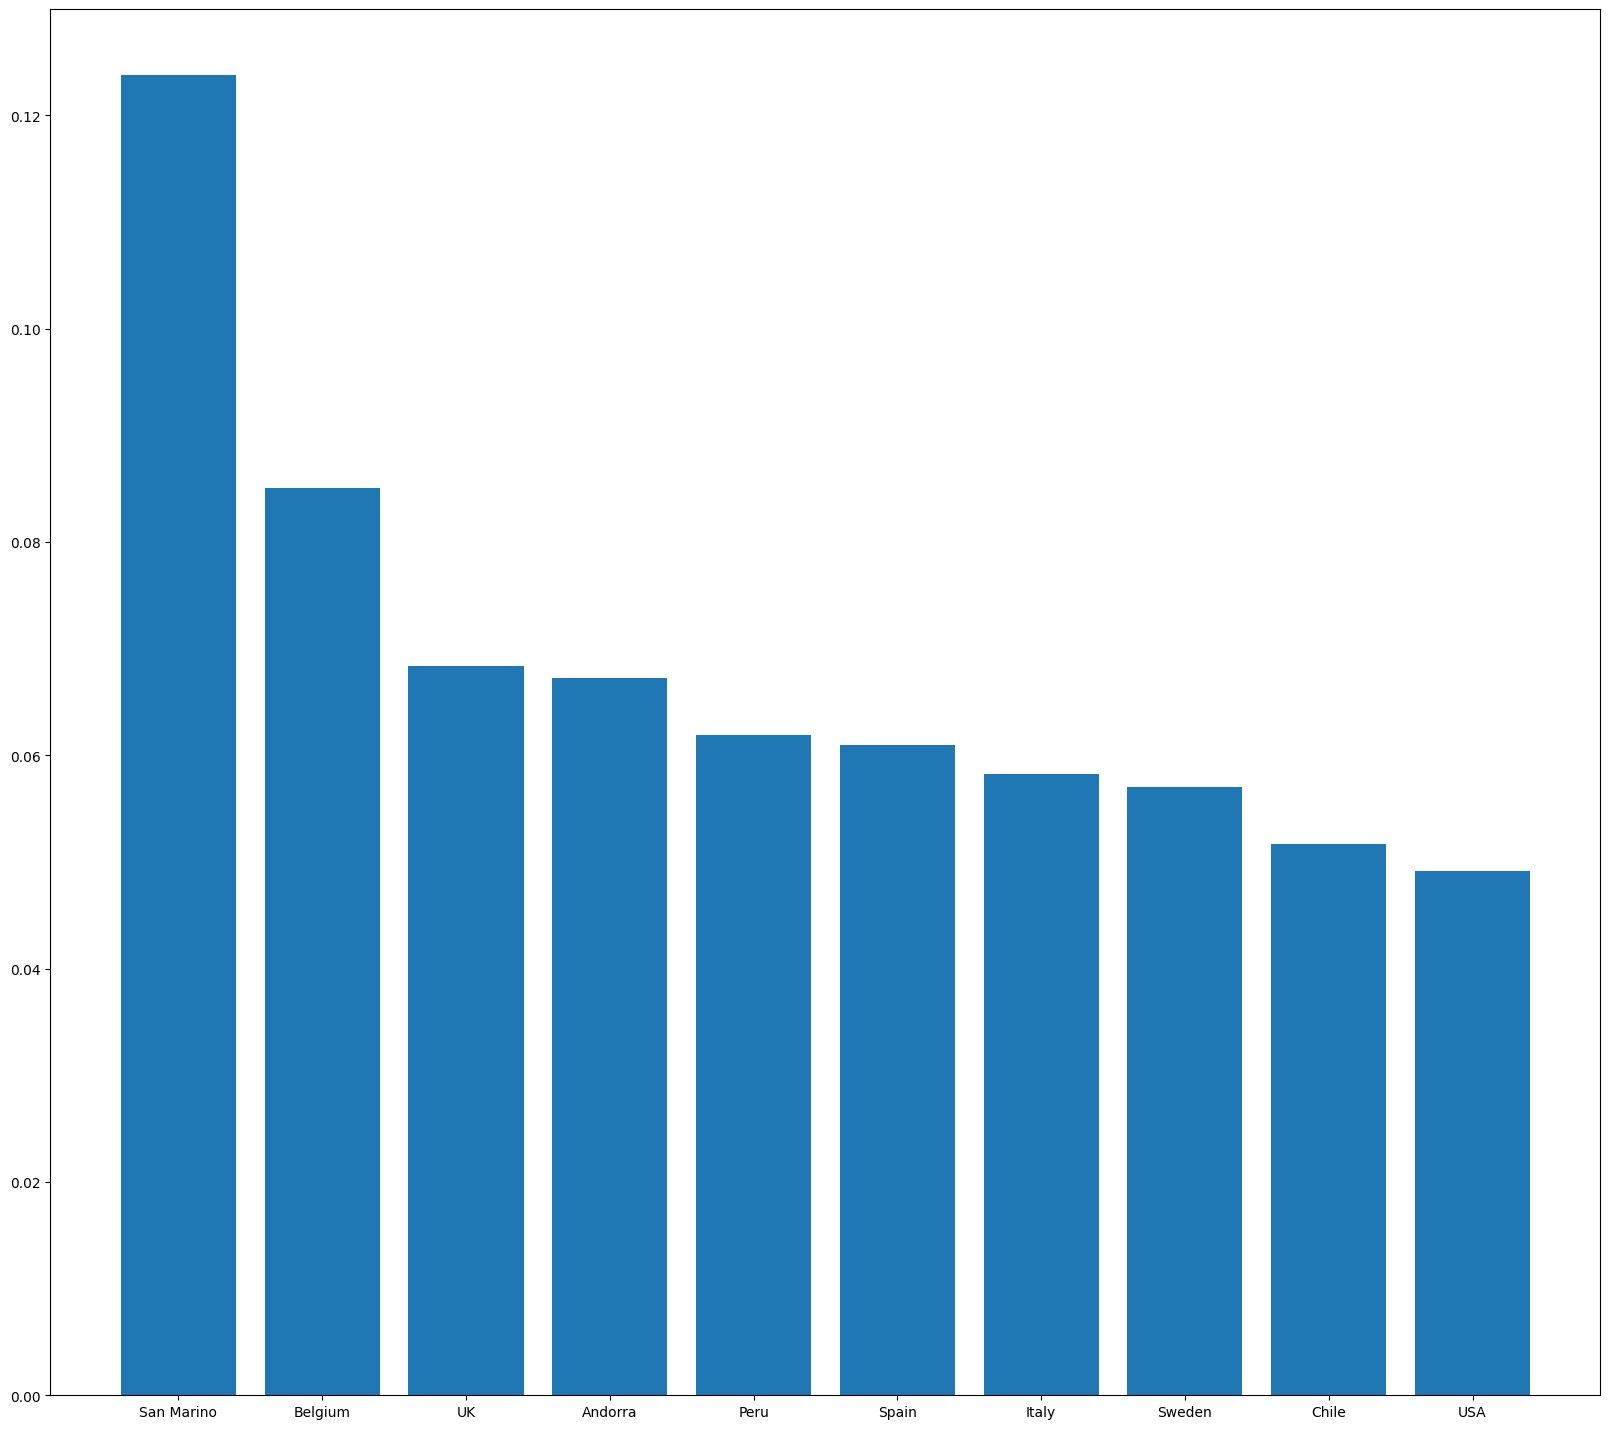

In [36]:
###Check the maximum mortality 
plt.figure(figsize=(20,18))
plt.bar(mortality_rates[:10].index,mortality_rates[:10])

### Tweets Analysis related to COVID

Data Source: https://www.kaggle.com/datasets/gpreda/covid19-tweets/code

In [24]:
df = pd.read_csv('data/tweets/covid19_tweets.csv')

In [25]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


#### Data Analysis

In [39]:
###Check sample tweets
df.loc[0,'text']

'If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0'

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [28]:
df.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


In [29]:

# Identify continuous variables
continuous_vars = []
for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        continuous_vars.append(column)

# Print the continuous variables
print("Continuous variables:", continuous_vars)


Continuous variables: ['user_followers', 'user_friends', 'user_favourites']


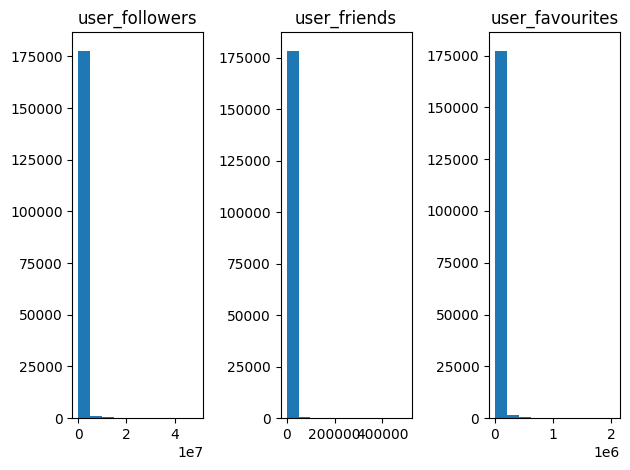

In [37]:


### We will check the hist for continuous variables

# Create a figure and subplots
fig, axs = plt.subplots(1, 3)

# Plot data on each subplot
axs[0].hist(df.loc[:,continuous_vars[0]])
axs[0].set_title(continuous_vars[0])
axs[1].hist(df.loc[:,continuous_vars[1]])
axs[1].set_title(continuous_vars[1])
axs[2].hist(df.loc[:,continuous_vars[2]])
axs[2].set_title(continuous_vars[2])


# Remove empty subplot
#fig.delaxes(axs[1, 1])

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [39]:
###Check the missing values
df.isnull().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

### Feature Extratction and Related Study

In [40]:
###Sort the tweets based on month of publish
df = df.dropna()
pd.DatetimeIndex(df['date']).month.unique()
top_july_tweets = df['user_location'][pd.DatetimeIndex(df['date']).month == 7].value_counts()
top_august_tweets = df['user_location'][pd.DatetimeIndex(df['date']).month == 8].value_counts()
top_all_tweets= (top_august_tweets + top_july_tweets).sort_values(ascending = False)

<AxesSubplot:title={'center':'Top 15 Countries Posting about Covid-19 in July 2020'}, xlabel='Location of User', ylabel='Number of Tweets'>

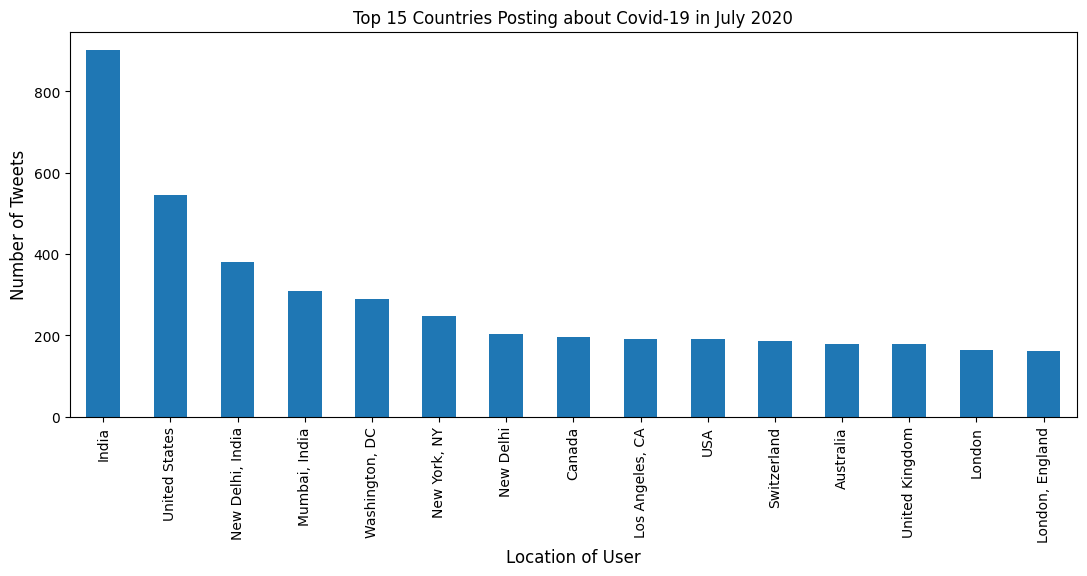

In [41]:
fig, ax = plt.subplots(figsize = (13,5))
plt.xlabel("Location of User", fontsize = 12)
plt.ylabel("Number of Tweets", fontsize = 12)
top_july_tweets[0:15].plot(kind='bar', title = "Top 15 Countries Posting about Covid-19 in July 2020", )

<AxesSubplot:title={'center':'Top 15 Countries Posting about Covid-19 in August'}, xlabel='Location of User', ylabel='Number of Tweets'>

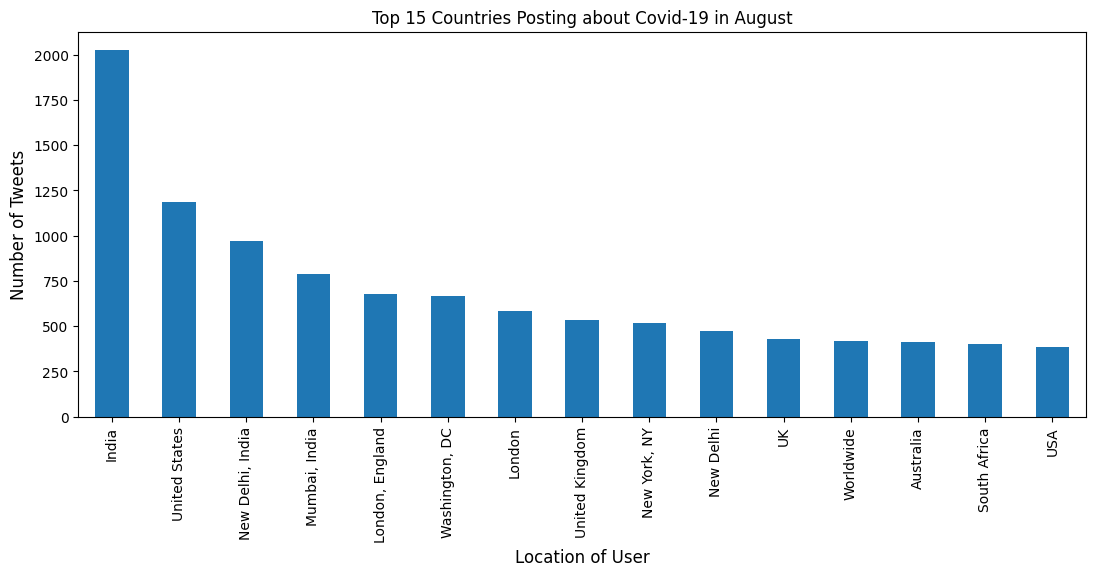

In [42]:
fig, ax = plt.subplots(figsize = (13,5))
plt.xlabel("Location of User", fontsize = 12)
plt.ylabel("Number of Tweets", fontsize = 12)
top_august_tweets[0:15].plot(kind='bar', title = "Top 15 Countries Posting about Covid-19 in August", )

We can see that maximum tweets is from India followed by United States.

In [ ]:
###Uncomment below incase not installed wordcloud
!pip install wordcloud

In [44]:
from wordcloud import WordCloud

In [45]:
#Creating the text variable
text_tweet = " ".join(cat.split()[1] for cat in df.text)


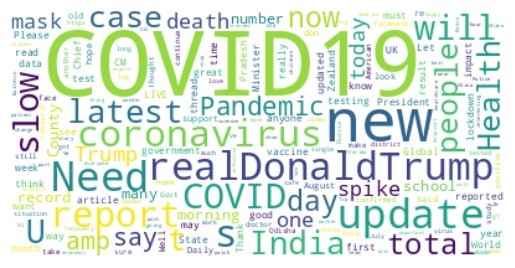

In [46]:
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text_tweet)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see some of important words like "slow" , "test", "health", "death", "lockdown" hasbeen mentioned manytime showing importance of this words during these period. 

We will be doing few other analysis related to job and economic sector.

In [48]:
###Check number of tweets related to job
count_job_tweets = 0 
for i in range(df.shape[0]):
    try:
        text = df.loc[i,'text']
    except:
        text = ''
    text_tweet_list = list(text.split(" "))
    counter = 0
    for item in text_tweet_list:
        if ((item=='job')|(item=='JOB')|(item=='Job')):
            counter =1
    if counter>0:
        count_job_tweets += 1

In [49]:
###Check percentage of tweets related to job
count_job_tweets*100/df.shape[0]

0.1654259718775848

We can see 0.16% tweets has word Job mentioned in it.

In [51]:
###Check number of tweets related to job
count_health_tweets = 0 
for i in range(df.shape[0]):
    try:
        text = df.loc[i,'text']
    except:
        text = ''
    text_tweet_list = list(text.split(" "))
    counter = 0
    for item in text_tweet_list:
        if ((item=='health')|(item=='Health')|(item=='HEALTH')):
            counter =1
    if counter>0:
        count_health_tweets += 1

In [52]:
###Check percentage of tweets related to health
count_health_tweets*100/df.shape[0]

1.2084165506667475

We can see that 1.20% tweets has 'health' word in it showing people are more concerned about health than jobs at the moment of data collection.

Analysis of users who are making most of the tweets

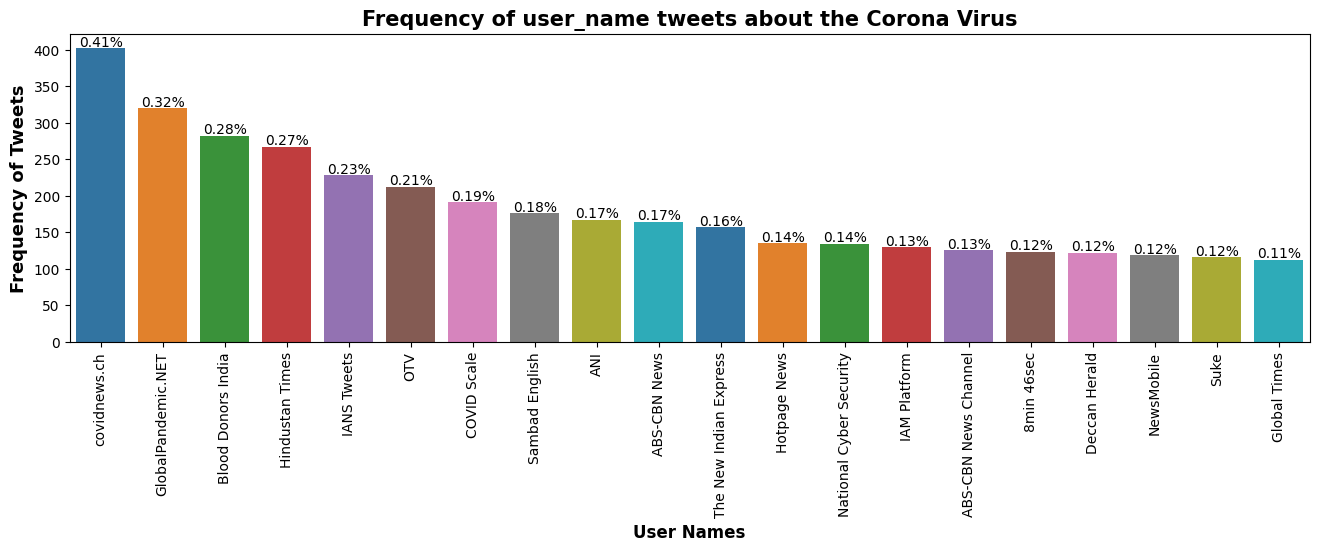

In [53]:
import seaborn as sns
def plot_frequency(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweets about the Corona Virus'.format(feature),weight='bold', size=15)
    plt.ylabel('Frequency of Tweets', size=13, weight='bold')
    plt.xlabel(title, size=12, weight='bold')
    plt.xticks(rotation=90)
    plt.show()

plot_frequency(df, 'user_name', 'User Names','tab10')


Let's analyse through the treemap, the users who has done highest tweets.

In [54]:
import plotly.graph_objs as go
import plotly.express    as px 
plt.figure(figsize=(10,14))
df_name_count = df['user_name'].value_counts().reset_index().rename(columns={
    'user_name':'tweets_count','index':'user_name'})
fig = px.treemap(df_name_count.head(20), path=['user_name'], values='tweets_count',
                title="<b>TreeMap for Top 20 users by Number of tweets done</b>") 

fig.show()

<Figure size 1000x1400 with 0 Axes>

Let's analyse through the treemap, the users who has have highest number of followers

In [55]:
###We will merge the df_name_count with df and then sort by user_followers 
df = pd.merge(df, df_name_count, on='user_name')
data_user = df.sort_values('user_followers',ascending=False).drop_duplicates(subset='user_name', keep="first")
data_user = data_user[['user_name', 'user_followers', 'tweets_count']]
data_user.sort_values('user_followers',ascending=False)

data_user1 = data_user.head(50).reset_index().copy()

In [56]:
fig = px.treemap(data_user1.head(20), path=['user_name'], values='user_followers',
                title="<b>TreeMap for Top 20 users by maximum  number of followers</b>",
                 color='tweets_count') 
fig.show()

### Job Market Analysis

Data Source: https://www.kaggle.com/datasets/vineethakkinapalli/impact-of-covid19-on-employment-ilostat 

In [6]:
df = pd.read_csv('data/job_market/employment_data.csv')

In [7]:
df.head()

,country,total_weekly_hours_worked(estimates_in_thousands),percentage_of_working_hrs_lost,percent_hours_lost_40hrs_per_week,percent_hours_lost_48hrs_per_week,labour_dependency_ratio,employed_female_25+_2019,employed_male_25+_2019,ratio_of_weekly_hours_worked_by_population_age_15-64
0,Afghanistan,350285.606,6.5,607.476,506.230,3.57,1334.243,5424.911,16.2
1,Angola,457913.433,8.6,1075.838,896.532,1.70,4612.109,4724.669,27.1
2,Albania,49922.483,3.9,51.087,42.572,1.77,500.112,651.870,25.5
3,United Arab Emirates,320690.368,9.3,824.579,687.149,0.41,996.030,5111.770,38.6
4,Argentina,525994.010,21.0,3492.559,2910.466,1.43,7264.330,9496.191,18.1


### Data Analysis

In [8]:
df.describe()

,total_weekly_hours_worked(estimates_in_thousands),percentage_of_working_hrs_lost,percent_hours_lost_40hrs_per_week,percent_hours_lost_48hrs_per_week,labour_dependency_ratio,employed_female_25+_2019,employed_male_25+_2019,ratio_of_weekly_hours_worked_by_population_age_15-64
count,2.830000e+02,283.000000,283.000000,283.000000,283.000000,2.830000e+02,2.830000e+02,283.000000
mean,4.176308e+06,8.924028,10102.181117,8418.484283,1.625901,3.776200e+04,5.856419e+04,23.459364
std,1.302655e+07,4.421625,31028.914618,25857.428843,0.686738,1.147626e+05,1.820665e+05,4.598613
min,9.957450e+02,-0.100000,-4.467000,-3.723000,0.320000,1.083000e+01,1.521000e+01,12.000000
25%,7.999320e+04,5.800000,103.471000,86.226000,1.180000,6.225455e+02,1.114258e+03,20.800000
50%,3.053470e+05,8.700000,607.476000,506.230000,1.420000,2.359041e+03,4.111453e+03,23.300000
75%,1.873128e+06,11.550000,5082.375500,4235.313000,1.865000,1.613397e+04,2.504481e+04,25.950000
max,1.255990e+08,27.500000,303009.768000,252508.140000,4.580000,1.117337e+06,1.756546e+06,39.100000


In [9]:
df.isnull().sum()

country                                                 0
total_weekly_hours_worked(estimates_in_thousands)       0
percentage_of_working_hrs_lost                          0
percent_hours_lost_40hrs_per_week                       0
percent_hours_lost_48hrs_per_week                       0
labour_dependency_ratio                                 0
employed_female_25+_2019                                0
employed_male_25+_2019                                  0
ratio_of_weekly_hours_worked_by_population_age_15-64    0
dtype: int64

In [10]:

# Identify continuous variables
continuous_vars = []
for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        continuous_vars.append(column)

# Print the continuous variables
print("Continuous variables:", continuous_vars)


Continuous variables: ['total_weekly_hours_worked(estimates_in_thousands)', 'percentage_of_working_hrs_lost', 'percent_hours_lost_40hrs_per_week', 'percent_hours_lost_48hrs_per_week', 'labour_dependency_ratio', 'employed_female_25+_2019', 'employed_male_25+_2019', 'ratio_of_weekly_hours_worked_by_population_age_15-64']


In [11]:
len(continuous_vars)

8

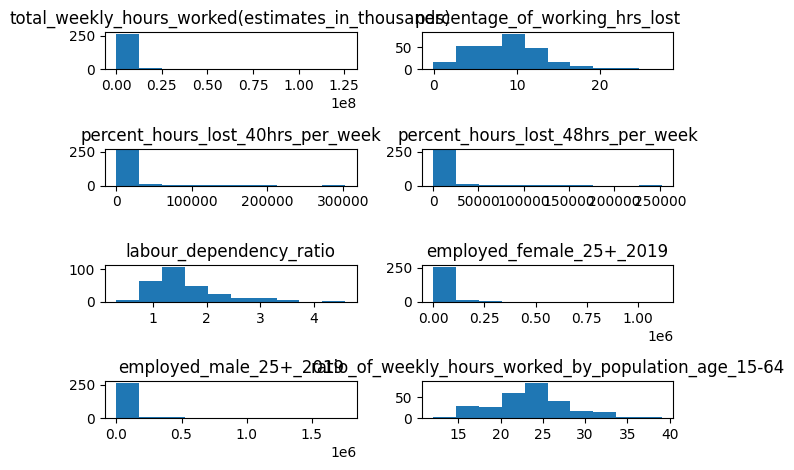

In [14]:
### We will check the hist for continuous variables

# Create a figure and subplots
fig, axs = plt.subplots(4, 2)

# Plot data on each subplot
axs[0,0].hist(df.loc[:,continuous_vars[0]])
axs[0,0].set_title(continuous_vars[0])
axs[0,1].hist(df.loc[:,continuous_vars[1]])
axs[0,1].set_title(continuous_vars[1])
axs[1,0].hist(df.loc[:,continuous_vars[2]])
axs[1,0].set_title(continuous_vars[2])
axs[1,1].hist(df.loc[:,continuous_vars[3]])
axs[1,1].set_title(continuous_vars[3])

axs[2,0].hist(df.loc[:,continuous_vars[4]])
axs[2,0].set_title(continuous_vars[4])
axs[2,1].hist(df.loc[:,continuous_vars[5]])
axs[2,1].set_title(continuous_vars[5])
axs[3,0].hist(df.loc[:,continuous_vars[6]])
axs[3,0].set_title(continuous_vars[6])
axs[3,1].hist(df.loc[:,continuous_vars[7]])
axs[3,1].set_title(continuous_vars[7])

# Remove empty subplot
#fig.delaxes(axs[1, 1])

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

### Other Analysis

In [42]:
###Check countries with maximum percentage job loss
number_of_job_lost = df[['country','percentage_of_working_hrs_lost']].sort_values(by='percentage_of_working_hrs_lost',ascending=False)
top_10 = number_of_job_lost[:10]
top_10

,country,percentage_of_working_hrs_lost
131,Peru,27.5
71,Honduras,24.3
130,Panama,23.5
4,Argentina,21.0
36,Colombia,20.9
20,Bolivia,20.5
151,El Salvador,19.4
212,Latin America and the Caribbean: Lower-middle ...,18.5
207,Americas: Lower-middle income,18.5
217,South America,17.7


<BarContainer object of 10 artists>

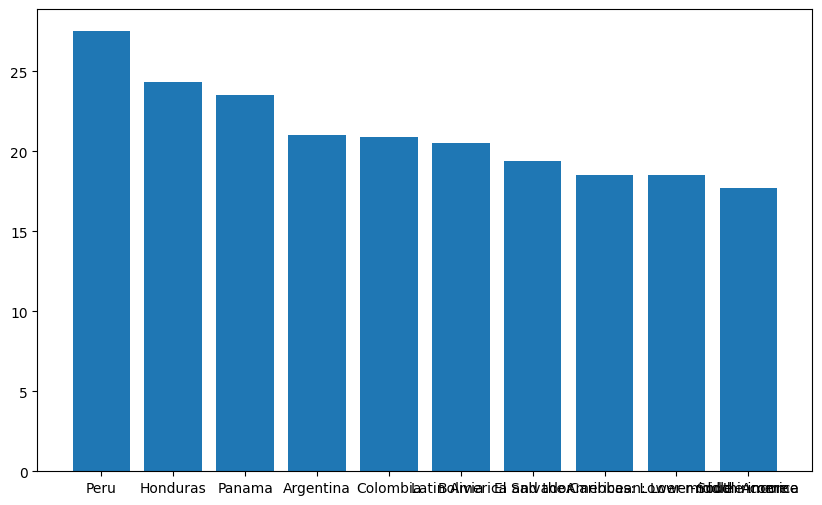

In [43]:
###Check the plots
plt.figure(figsize=(10,6))
plt.bar(top_10['country'],top_10['percentage_of_working_hrs_lost'])

Text(0.5, 1.0, 'Total hours worked by various countries')

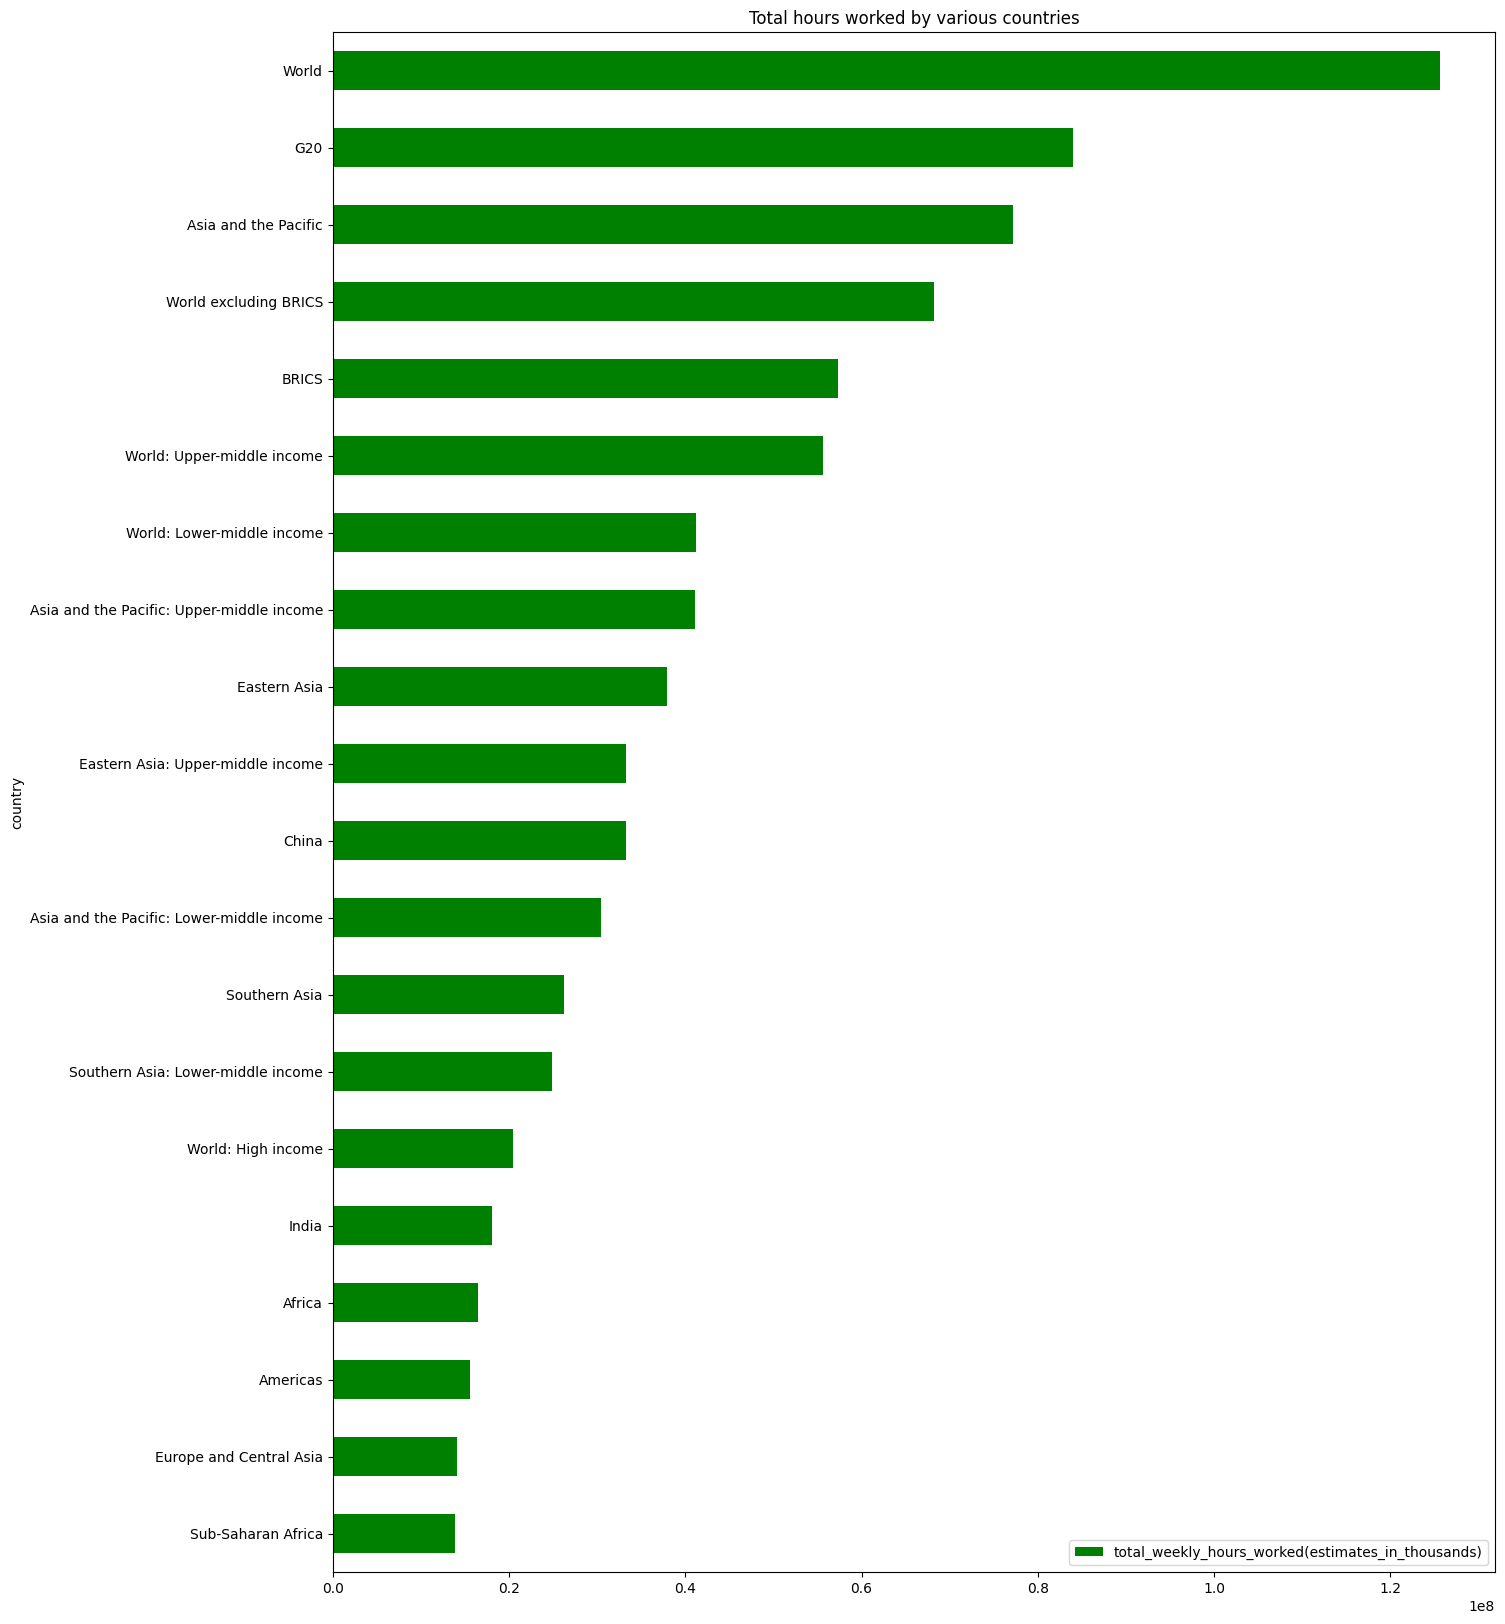

In [44]:
data_work_hour=df.sort_values(by='total_weekly_hours_worked(estimates_in_thousands)',ascending=True).tail(20)
data_hrloss=df.sort_values(by='percentage_of_working_hrs_lost',ascending=True).tail(20)
f,(ax1)=plt.subplots(1,1,figsize=(15,20))
data_work_hour.plot(kind='barh',x='country',y='total_weekly_hours_worked(estimates_in_thousands)'
                    ,ax=ax1,color='green')
plt.title('Total hours worked by various countries')


Plots of countries where highest perecentage of working hours lost

Text(0.5, 1.0, 'Total hours lost by various countries')

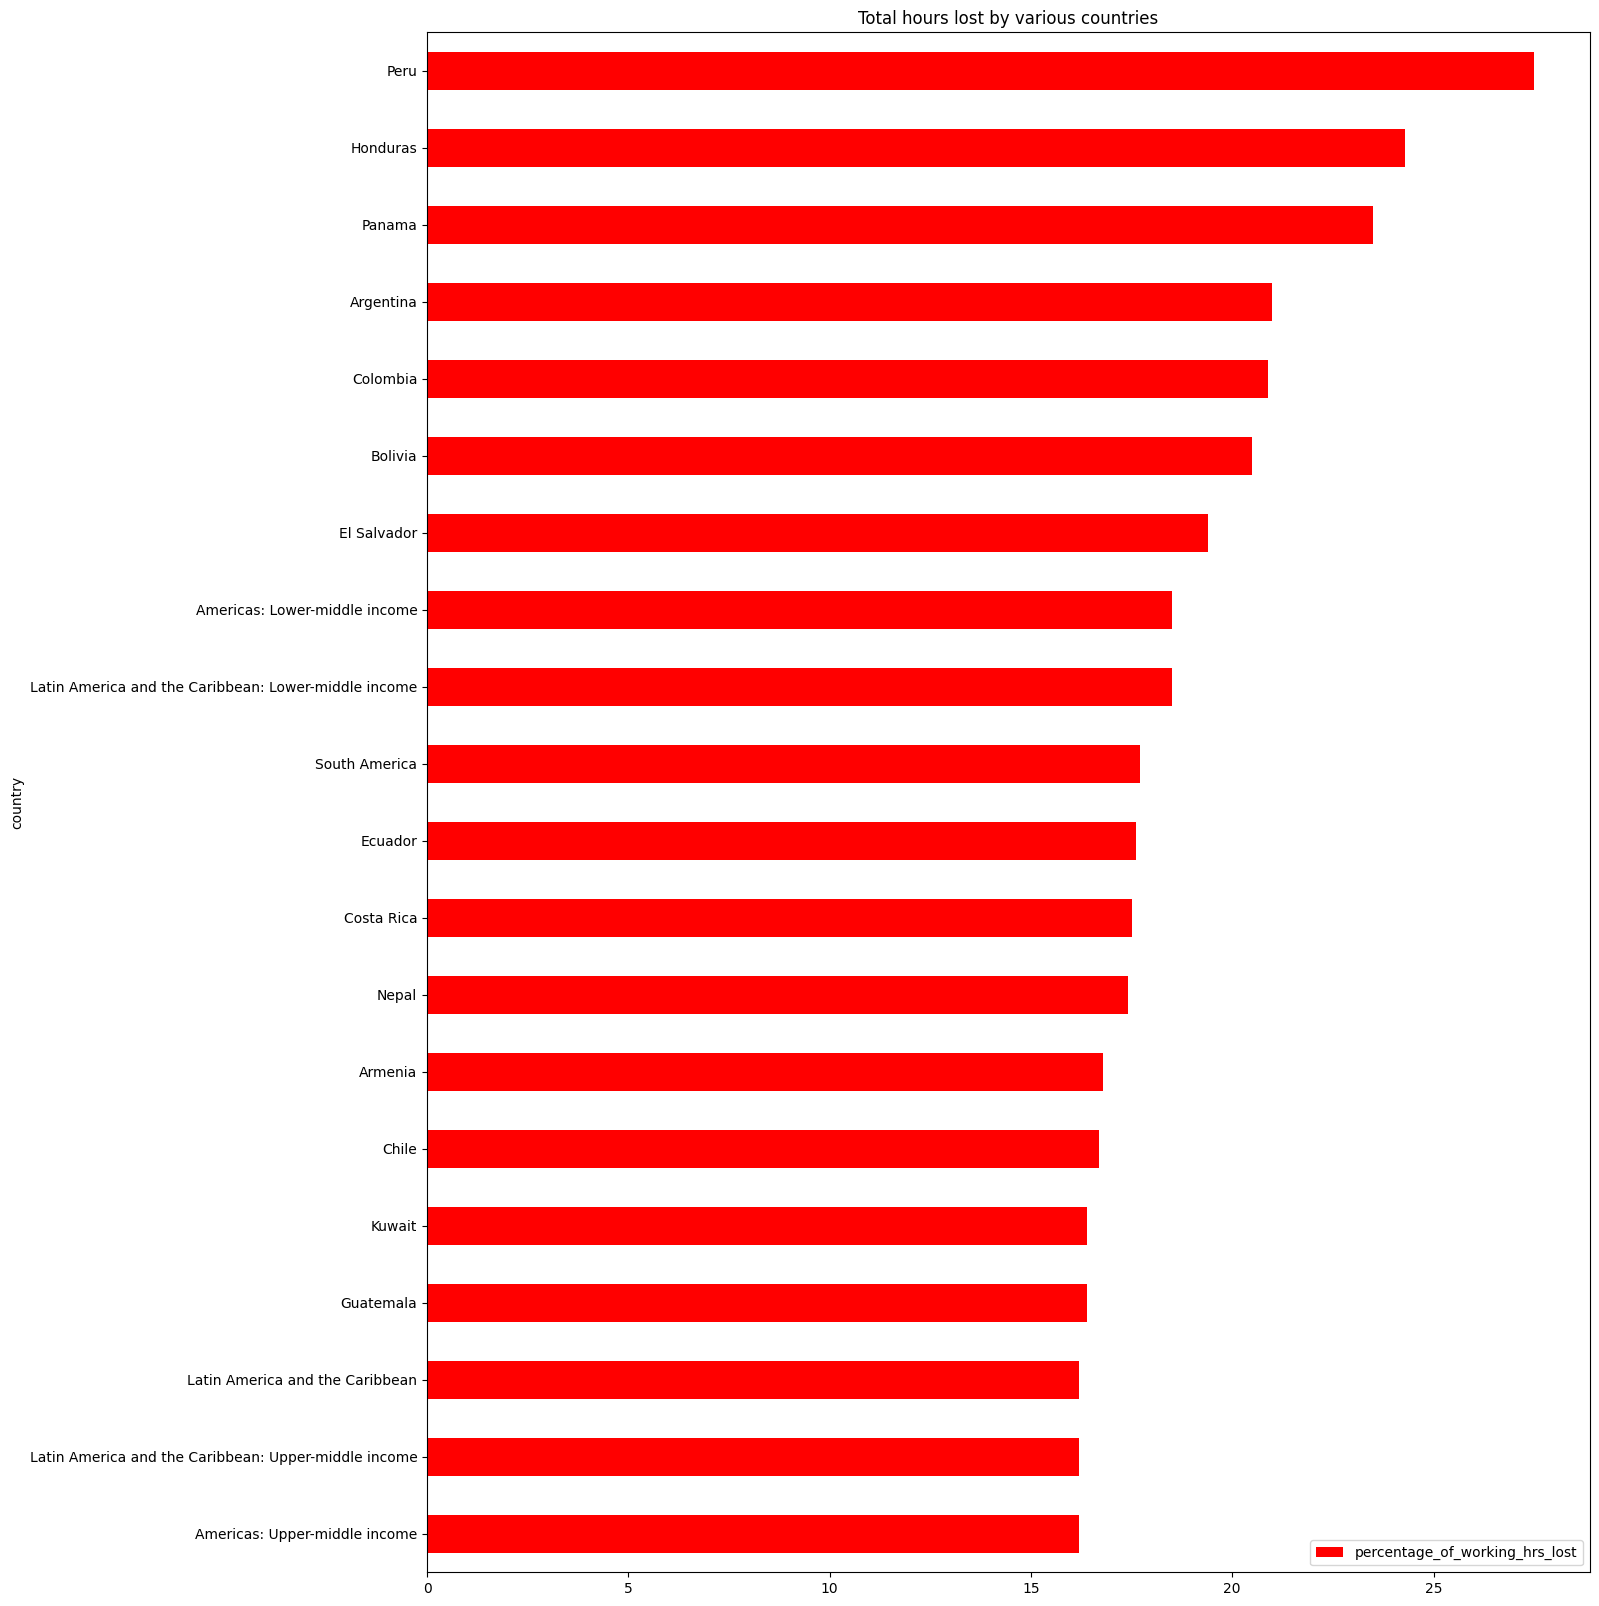

In [45]:
data_hrloss=df.sort_values(by='percentage_of_working_hrs_lost',ascending=True).tail(20)
f,(ax1)=plt.subplots(1,1,figsize=(15,20))
data_hrloss.plot(kind='barh',x='country',y='percentage_of_working_hrs_lost'
                    ,ax=ax1,color='red')
plt.title('Total hours lost by various countries')

Heatmap to check the interdepenadnce of features among them as below: 

<AxesSubplot:>

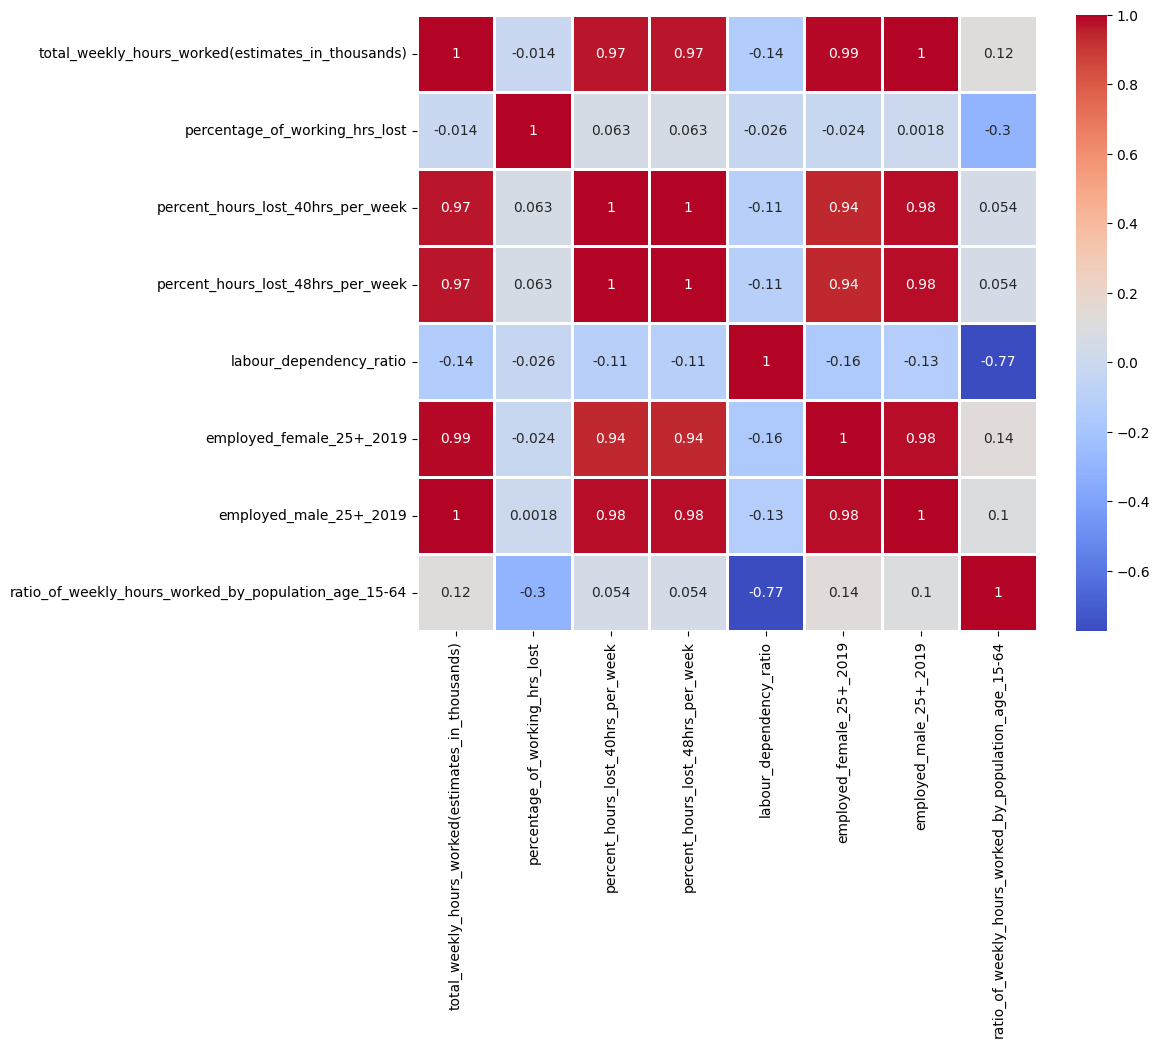

In [46]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,linewidth = 1, cmap='coolwarm')

### Tech Companies Stocks Data during COVID Phase

In [ ]:
!pip install yfinance

In [65]:
import yfinance as yf

In [66]:
symbols = ['AAPL', 'MSFT', 'GOOG'] 

tickers = [yf.Ticker(symbol) for symbol in symbols]
start_date = '2018-01-01'
end_date = '2022-01-01'
stocks_data = pd.DataFrame()

for ticker,symbol in zip(tickers,symbols):
    data = ticker.history(start=start_date, end=end_date)
    stocks_data[symbol] = data['Close']



In [67]:
stocks_data.head()

,AAPL,MSFT,GOOG
Date,,,
2018-01-02 00:00:00-05:00,40.831589,80.562035,53.250000
2018-01-03 00:00:00-05:00,40.824478,80.936966,54.124001
2018-01-04 00:00:00-05:00,41.014107,81.649345,54.320000
2018-01-05 00:00:00-05:00,41.481071,82.661644,55.111500
2018-01-08 00:00:00-05:00,41.327000,82.745987,55.347000


Text(0.5, 1.0, 'Tech Stocks Price during COVID Phase')

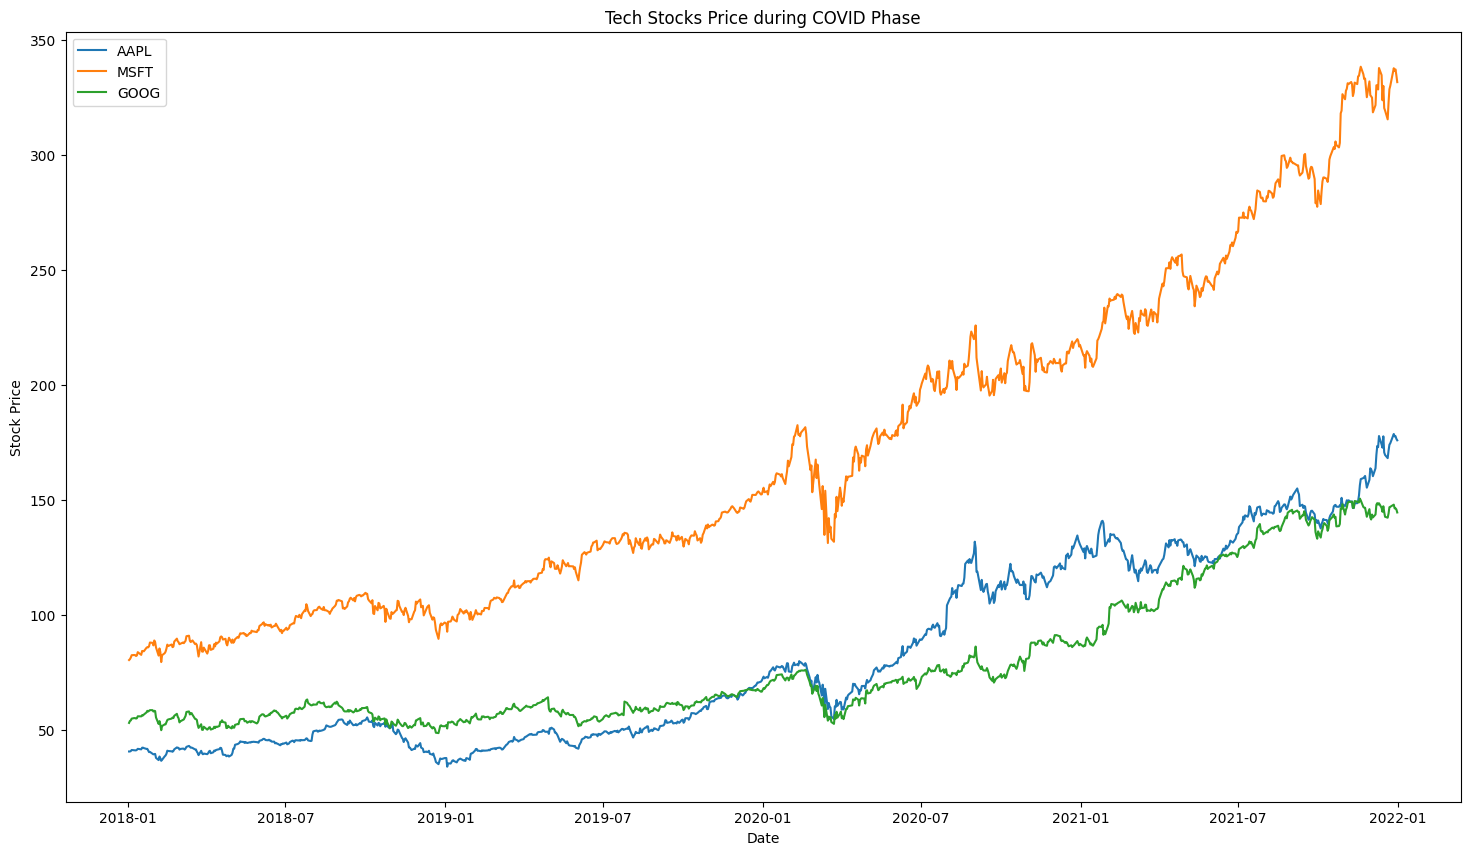

In [68]:

fig, ax = plt.subplots(figsize=(18,10))

ax.plot(stocks_data.index, stocks_data['AAPL'],label='AAPL')
ax.plot(stocks_data.index, stocks_data['MSFT'],label='MSFT')
ax.plot(stocks_data.index, stocks_data['GOOG'],label='GOOG')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.legend()
ax.set_title('Tech Stocks Price during COVID Phase')

We can see that tech stocks slightly dipped during Jan 2020 to June 2020 Phase otherwise they have been growing good from 2018 to 2022.